In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [21]:
# Reference data files *** USE ONLY ONE FILE IF ONLY ADDRESSING ONE QUESTION ***
crime_data_path = "Resources/one_year_dc-crimes-search-results.csv"
weather_data_path = "output_data/dc_weather.csv"

# Read the data files 
crime_data = pd.read_csv(crime_data_path)
weather_data = pd.read_csv(weather_data_path)

#Reduce to the columns we need - those by day and not hour
weather_day = weather_data[["Date_ID","date", "avgtemp_f", "totalprecip_in","avghumidity","day_condition"]]
weather_day.tail()

,Date_ID,date,avgtemp_f,totalprecip_in,avghumidity,day_condition
360,360,2023-02-01,36.5,0.00,63.0,Overcast
361,361,2023-02-02,35.1,0.08,66.0,Light drizzle
362,362,2023-02-03,33.3,0.00,49.0,Partly cloudy
363,363,2023-02-04,26.8,0.00,35.0,Cloudy
364,364,2023-02-05,41.1,0.00,61.0,Overcast


In [22]:
# Review of data is under Question 1 file. Decide if to combine responses to multiple Questions into one file 

# Address question 2 - What are general weather data trends in Washington DC for the last year?

# Adjust the "date" so that the data can be grouped by month 

# Option 1 - Create a "Year-Month" column based on the string of the initial date column 
weather_day["Year-Month"] = weather_day["date"].str.slice(0,7)

# Option 2 - create a new column with the date formatted to datetime and insert month in a new column
weather_day["date_formatted"] = pd.to_datetime(weather_day['date'],format='%Y-%m-%d')
weather_day['month'] = pd.DatetimeIndex(weather_day['date_formatted']).month

#View new columns in dataframe
weather_day


/Users/djmac2022/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/djmac2022/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/djmac2022/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a cop

,Date_ID,date,avgtemp_f,totalprecip_in,avghumidity,day_condition,Year-Month,date_formatted,month
0,0,2022-02-06,32.8,0.00,52.0,Sunny,2022-02,2022-02-06,2
1,1,2022-02-07,38.0,0.00,61.0,Cloudy,2022-02,2022-02-07,2
2,2,2022-02-08,39.1,0.00,59.0,Cloudy,2022-02,2022-02-08,2
3,3,2022-02-09,43.2,0.00,63.0,Overcast,2022-02,2022-02-09,2
4,4,2022-02-10,45.3,0.00,68.0,Partly cloudy,2022-02,2022-02-10,2
...,...,...,...,...,...,...,...,...,...
360,360,2023-02-01,36.5,0.00,63.0,Overcast,2023-02,2023-02-01,2
361,361,2023-02-02,35.1,0.08,66.0,Light drizzle,2023-02,2023-02-02,2
362,362,2023-02-03,33.3,0.00,49.0,Partly cloudy,2023-02,2023-02-03,2
363,363,2023-02-04,26.8,0.00,35.0,Cloudy,2023-02,2023-02-04,2


In [47]:
# Group the data into months for the bar chart

weather_monthlyT = weather_day.groupby("Year-Month").mean()["avgtemp_f"]
#weather_month[""] = crime_type[["offensegroup"]].count()
#count_crime_type
weather_monthlyT

Year-Month
2022-02    42.086957
2022-03    51.083871
2022-04    57.330000
2022-05    67.919355
2022-06    76.763333
2022-07    82.048387
2022-08    81.419355
2022-09    73.586667
2022-10    58.841935
2022-11    52.196667
2022-12    40.067742
2023-01    44.783871
2023-02    34.560000
Name: avgtemp_f, dtype: float64

In [49]:
weather_monthlyH = weather_day.groupby("Year-Month").mean()["avghumidity"]
weather_monthlyH

Year-Month
2022-02    60.695652
2022-03    65.741935
2022-04    62.700000
2022-05    73.483871
2022-06    65.066667
2022-07    68.870968
2022-08    65.483871
2022-09    61.933333
2022-10    63.161290
2022-11    62.900000
2022-12    67.290323
2023-01    69.258065
2023-02    54.800000
Name: avghumidity, dtype: float64

In [50]:
weather_monthlyP = weather_day.groupby("Year-Month").sum()["totalprecip_in"]
weather_monthlyP

Year-Month
2022-02    0.23
2022-03    0.74
2022-04    0.61
2022-05    1.44
2022-06    1.11
2022-07    1.56
2022-08    1.33
2022-09    0.46
2022-10    0.51
2022-11    0.80
2022-12    1.18
2023-01    0.62
2023-02    0.08
Name: totalprecip_in, dtype: float64

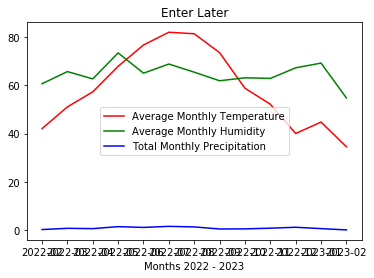

In [52]:
#Address question 2 - What are general weather trends in Washington DC for the last year?

# Create the x-axis
year_month = weather_monthlyP.index
# Plot the monthly averages and monthly total vs year-month
plt.plot(year_month, weather_monthlyT, color="red", label="Average Monthly Temperature")
plt.plot(year_month, weather_monthlyH, color="green", label="Average Monthly Humidity")
plt.plot(year_month, weather_monthlyP, color="blue", label="Total Monthly Precipitation")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Enter Later")
plt.xlabel("Months 2022 - 2023")
#plt.xticks(np.arange(min(year_month), max(year_month)+1, 1.0))

# Print our chart to the screen
plt.show()